***This notebook is developed by Prof. Monali Mavani***

This notebook demonstates
1. Create, train and evaluate Convolution Neural Network using torch.nn.Module

Dataset: https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html

Reference : https://pytorch.org/

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import time
import datetime
import os

In [ ]:
# Step 1: Initialize Parameters and Hyperparameters
# Hyperparameters
input_size = 28 * 28  # MNIST images are 28x28
#hidden_size = 1024
hidden_size = 256
num_classes = 10      # MNIST has 10 classes (digits 0-9)
learning_rate = 0.001
batch_size = 64
num_epochs = 5

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

**Transforms** are common image transformations. They can be chained together using Compose

All transformations accept PIL Image, Tensor Image or batch of Tensor Images as input. Tensor Image is a tensor with (C, H, W) shape, where C is a number of channels, H and W are image height and width. Batch of Tensor Images is a tensor of (B, C, H, W) shape, where B is a number of images in the batch.

**transforms.toTensor()** Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]

**transforms.Normalize((0.5,), (0.5,)** :  
normalizes the data of [0,1] into [-1,1] scale by performing (input-0.5)/0.5, so [0,1]->[-1,1]

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/')

### Understanding torchvision datasets

In [ ]:
# MNIST dataset (28x28 images of digits 0-9)

train_dataset1 = torchvision.datasets.MNIST(root='./data', train=True, transform=None, download=False)
test_dataset1 = torchvision.datasets.MNIST(root='./data', train=False, transform=None)

len(train_dataset1)

60000

In [ ]:
len(test_dataset1)

10000

In [ ]:
#first element is a PIL image and the second is an target
train_dataset1[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [ ]:
train_image_zero, train_target_zero = train_dataset1[0]
train_image_zero
print(train_image_zero.size)


(28, 28)


In [ ]:
print(train_image_zero.size)
print(train_target_zero)

(28, 28)
5


### loading dataset using data loader

In [ ]:
# Step 2: Load MNIST dataset and perform image pre processing
# MNIST dataset (28x28 images of digits 0-9)

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)


In [ ]:
train_dataset[0]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

DataLoader()
The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API. PyTorch Dataloader is a utility class designed to simplify loading and iterating over datasets while training deep learning models. It has various constraints to iterating datasets, like batching, shuffling, and processing data

In [ ]:
# DataLoader returns the batched data (input features and labels) to the training loop.
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
#iterating over dataloader, each batch size is 10000
i=0
for X_batch, y_batch in train_loader:
    #print(X_batch, y_batch)
    print(X_batch.shape, y_batch.shape)
    i=i+1
    if i==1:
      break


torch.Size([64, 1, 28, 28]) torch.Size([64])


### Define the Neural Network using torch.nn.Module
Base class for all neural network modules. Your models should also subclass this class.

An nn.Module contains layers, and a method forward(input) that returns the output.

https://pytorch.org/docs/stable/nn.html


In [ ]:
# Step 3: Define the CNN model
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2) #stride  is not specified by default, it is set equal to the pooling kernel size.
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2)
        self.relu = nn.ReLU()
           # Input size adjusted for the output of conv layers
        self.fc3 = nn.Linear(7 * 7 * 64,hidden_size)  # if just one conv layer
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(hidden_size, 10)  # 10 classes for digits 0-9

    def forward(self, x):
        x = self.conv1(x)  # Pass the input through the first convolutional layer
        x = self.relu(x)  # Apply ReLU activation
        x = self.pool(x)  # Apply max pooling

        x = self.conv2(x)  # Pass the output through the second convolutional layer
        x = self.relu(x)  # Apply ReLU activation
        x = self.pool(x)  # Apply max pooling


        # Flatten the output of the convolutional layers for the fully connected layers
        x = torch.flatten(x, 1)


        #x = self.fc1(x)
        x = self.fc3(x)

        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x

In [ ]:
#create an instance of  (Initialize the model), and move it to the device, and print its structure.
model = DNN().to(device)
print(model)

DNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu): ReLU()
  (fc3): Linear(in_features=3136, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
#Returns the total number of elements in the input tensor.
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of trainable model parameters:", num_params)

Total number of trainable model parameters: 857738


In [ ]:
# Step 4: Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Step 5: Train the model
start_time = time.time()

for epoch in range(num_epochs):
    print(f'Starting epoch {epoch + 1}')
    running_loss = 0.0

    model.train() # Set the model to training mode
   # i=0
   # print("epoch no:", epoch)
    for i, batch in enumerate(train_loader,0):
        #i=i+1

        images, labels = batch
        images, labels = images.to(device), labels.to(device) # Move the model to the device

        # Forward propagate
        outputs = model(images) # Forward pass
        loss = criterion(outputs, labels) # Compute the loss

        # Backpropagate
        optimizer.zero_grad() # Zero the gradients
        loss.backward() # Backward pass (compute gradients)

       # Update parameters
        optimizer.step() # Update model parameters

        running_loss += loss.item()
        if i % 100 == 99:
             print(f'batch {i+1}, Loss: {running_loss/100}')
             running_loss = 0.0

   # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

end_time = time.time() # Record end time
print('Training process has been completed. ')
training_time = end_time - start_time

print('Training time:', str(datetime.timedelta(seconds=training_time))) # for calculating the training time in minutes and seconds format


Starting epoch 1
batch 100, Loss: 0.6612467194348574
batch 200, Loss: 0.18559138283133506
batch 300, Loss: 0.1441069777496159
batch 400, Loss: 0.1357010205090046
batch 500, Loss: 0.10418852601200342
batch 600, Loss: 0.0967840416636318
batch 700, Loss: 0.08494564363732934
batch 800, Loss: 0.0720214920444414
batch 900, Loss: 0.06952681160066276
Starting epoch 2
batch 100, Loss: 0.06930883675813675
batch 200, Loss: 0.05575339860282838
batch 300, Loss: 0.05692490827292204
batch 400, Loss: 0.05783695822348818
batch 500, Loss: 0.05758682055398822
batch 600, Loss: 0.06358675364172087
batch 700, Loss: 0.062300078297266734
batch 800, Loss: 0.06406946506816893
batch 900, Loss: 0.05902941734180786
Starting epoch 3
batch 100, Loss: 0.041709163072519005
batch 200, Loss: 0.045649244928499685
batch 300, Loss: 0.04100570324575528
batch 400, Loss: 0.045426054960116743
batch 500, Loss: 0.03869757210137323
batch 600, Loss: 0.035657332440605385
batch 700, Loss: 0.03977602682658471
batch 800, Loss: 0.03857

In [ ]:
# Step 6: Evaluate model performance
model.eval() # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for batch in test_loader:
        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1) #Get the predicted classes from the output logits

        total += labels.size(0) #labels:Tensor with dimensions [no of samples in the batch, 1], labels.size(0) returns no of samples in a batch
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

Accuracy of the model on the test images: 99.26%


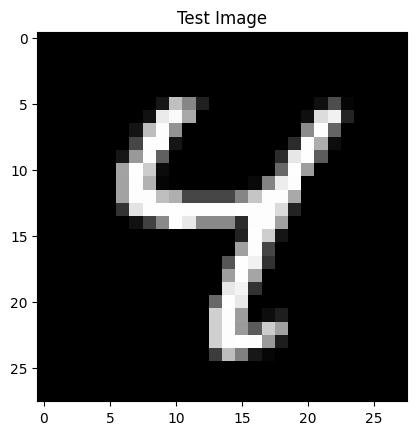

Predicted label for the first test image: 4


In [ ]:
import matplotlib.pyplot as plt

# Step 7: Use the model for inference
sample_image, _ = test_dataset[6]  # Take the sixth test sample

# Display the test image
plt.imshow(sample_image.squeeze(), cmap='gray')  # Remove the batch dimension and display the image
plt.title('Test Image')
plt.show()

# Add batch dimension and move the image to the device
sample_image = sample_image.unsqueeze(0).to(device)  # Add batch dimension

# Set model to evaluation mode
model.eval()

# Perform inference without tracking gradients
with torch.no_grad():
    prediction = model(sample_image)
    predicted_label = torch.argmax(prediction, 1).item()  # Get the predicted class label
    print(f'Predicted label for the first test image: {predicted_label}')
